In [4]:
!find data/train_images -type f | wc -l

91


In [3]:
import matplotlib.pyplot as plt
import re
import numpy as np

# Replace this with the path to your log file
file_path = 'training_log_tma.txt'

# Lists to store the extracted loss and accuracy values
losses = []
accuracies = []

# Regular expression pattern to match the relevant lines
pattern = re.compile(r"Epoch \d+/\d+, Steps: \d+, Loss: ([\d.]+), Validation Accuracy: ([\d.]+)%")

# Read the file and extract the loss and accuracy values
with open(file_path, 'r') as file:
    for line in file:
        match = pattern.match(line)
        if match:
            loss, accuracy = match.groups()
            losses.append(float(loss))
            accuracies.append(float(accuracy))

window_size = 10
moving_avg_accuracies = np.convolve(accuracies, np.ones(window_size)/window_size, mode='valid')

# Plotting the loss and accuracy over epochs
epochs = list(range(1, len(losses) + 1))
avg_epochs = epochs[window_size-1:]

# Creating a figure and axis object
fig, ax1 = plt.subplots()

# Plotting the loss values
color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis to plot the accuracy values
ax2 = ax1.twinx()
color_original = 'tab:blue'
color_avg = 'tab:blue'
ax2.set_ylabel('Validation Accuracy (%)', color=color_original)
line1, = ax2.plot(epochs, accuracies, color=color_original, label='Original Accuracy', alpha=0.2)
line2, = ax2.plot(avg_epochs, moving_avg_accuracies, color=color_avg, linestyle='--', label=f'{window_size}-Epoch Avg Accuracy')
ax2.tick_params(axis='y', labelcolor=color_original)

# # Adding a legend
# lines = [line1, line2]
# ax2.legend(lines, [l.get_label() for l in lines])

# Showing the plot
fig.tight_layout()
plt.title('Training Loss and Validation Accuracy over Epochs')
plt.grid(True)
plt.show()


ValueError: v cannot be empty

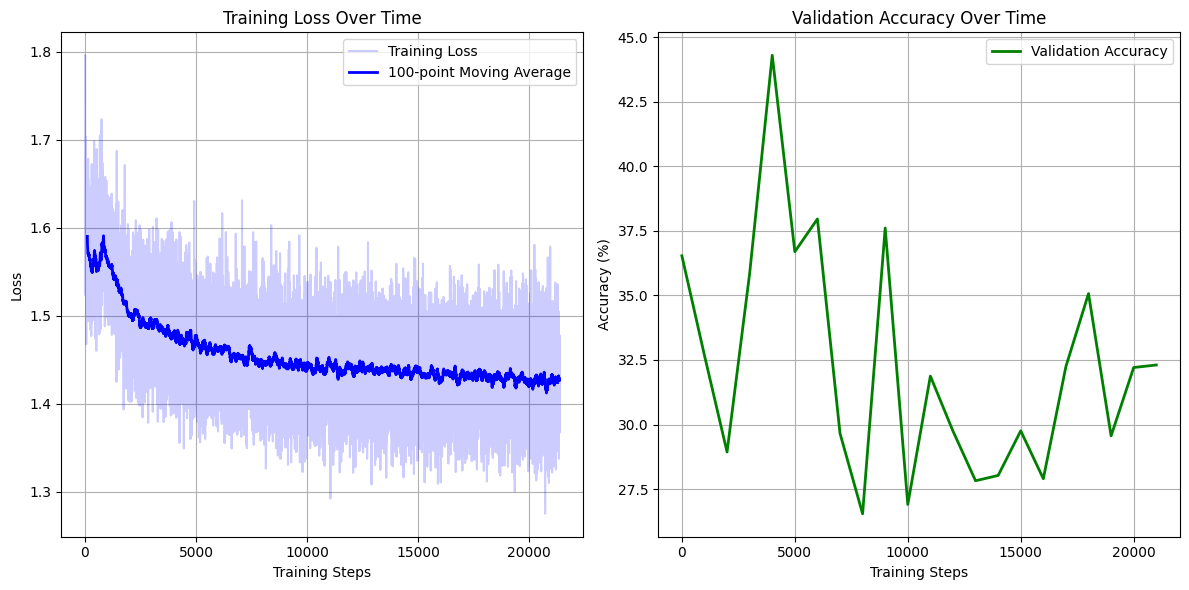

In [12]:
import matplotlib.pyplot as plt
import re
import numpy as np

def plot_training_loss_and_accuracy(file_path):
    # Initialize lists to store epoch, step, loss, and accuracy values
    epochs = []
    steps = []
    losses = []
    accuracies = []
    accuracy_steps = []

    # Regular expression pattern to match the lines with loss and accuracy information
    loss_pattern = re.compile(r'epoch: (\d+), step: (\d+), loss: ([\d.]+)')
    accuracy_pattern = re.compile(r'epoch: (\d+), step: (\d+), validation accuracy: ([\d.]+)%')

    # Read the file and extract the loss and accuracy information
    with open(file_path, 'r') as file:
        for i, line in enumerate(file):
            loss_match = loss_pattern.match(line.strip())
            if loss_match:
                if i < 10:
                    continue
                epoch, step, loss = map(float, loss_match.groups())
                epochs.append(epoch)
                steps.append(step)
                losses.append(loss)

            accuracy_match = accuracy_pattern.match(line.strip())
            if accuracy_match:
                _, step, accuracy = map(float, accuracy_match.groups())
                accuracies.append(accuracy)
                accuracy_steps.append(step)

    # Create a combined x-axis value using epoch and step (assuming steps are uniform across epochs)
    max_step = max(steps)
    combined_x_axis = [epoch * (max_step + 1) + step for epoch, step in zip(epochs, steps)]
    accuracy_combined_x_axis = [epoch * (max_step + 1) + step for epoch, step in zip(epochs, accuracy_steps)]

    # Calculate moving average for loss
    window = 100
    loss_moving_avg = np.convolve(losses, np.ones(window)/window, mode='valid')
    loss_moving_avg_x_axis = combined_x_axis[window-1:]

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    plt.plot(combined_x_axis, losses, label='Training Loss', alpha=0.2, color='blue')
    plt.plot(loss_moving_avg_x_axis, loss_moving_avg, label=f'{window}-point Moving Average', linewidth=2, color='blue')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.legend()
    plt.grid(True)

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(accuracy_combined_x_axis, accuracies, label='Validation Accuracy', linewidth=2, color='green')
    plt.xlabel('Training Steps')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy Over Time')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Specify the path to your training log file
file_path = 'training_log_non_tma.txt'
plot_training_loss_and_accuracy(file_path)


In [1]:
import os
import pandas as pd
train = pd.read_csv("train-yes-tma.csv")
train.head()

# Assuming train is a previously defined DataFrame
# and has a column named 'image_id'

def get_image_path(image_id: int):
    return os.path.join("tiles", str(image_id))

def count_files_in_directory(directory_path: str):
    try:
        # List all files and directories in the specified path
        files_and_dirs = os.listdir(directory_path)
        
        # Filter out directories, count only files
        files = [f for f in files_and_dirs if os.path.isfile(os.path.join(directory_path, f))]
        return len(files)
    except FileNotFoundError:
        # Return 0 if the directory does not exist
        return 0

# Add a 'tile_path' column to the DataFrame
train['tile_path'] = train['image_id'].apply(lambda x: get_image_path(x))

# Add a 'num_files' column to the DataFrame
train['num_files'] = train['tile_path'].apply(lambda x: count_files_in_directory(x))

# Show the first few rows of the DataFrame
train.head()


,image_id,label,image_width,image_height,is_tma,tile_path,num_files
0,31594,EC,3388,3388,True,tiles/31594,115
1,41586,CC,2964,2964,True,tiles/41586,195
2,91,HGSC,3388,3388,True,tiles/91,255
3,36583,LGSC,3388,3388,True,tiles/36583,163
4,35565,MC,2964,2964,True,tiles/35565,145


In [2]:
train.groupby('label').sum('num_files')['num_files']

label
CC      690
EC      631
HGSC    703
LGSC    581
MC      706
Name: num_files, dtype: int64

In [4]:
train.groupby('is_tma').sum('num_files')

,image_id,image_width,image_height,num_files
is_tma,,,,
False,15900129,24785936,15059549,8718091
True,834785,77072,77072,3813


In [14]:
((8718091 + 3813) / 8718091) / (1.000437366391335 + 2287.4125360608446)

0.00043717518560167594

In [13]:
((8718091 + 3813) / 3813) / (1.000437366391335 + 2287.4125360608446)

0.9995628248143983

In [7]:
import numpy as np

# Calculate class weights
class_counts = np.array([3447275, 1779729, 2016320, 535236, 943344], dtype=np.float32)
class_weights = 1. / class_counts
class_weights /= class_weights.sum()
class_weights

array([0.0678351 , 0.13139431, 0.11597676, 0.43690306, 0.24789076],
      dtype=float32)

In [8]:
class_counts / class_counts.sum()

array([0.3952434 , 0.2040528 , 0.23117888, 0.06136687, 0.10815804],
      dtype=float32)

In [36]:
!nvidia-smi

Tue Oct 31 20:23:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0   291W / 300W |  12972MiB / 16384MiB |     90%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------